In [1]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt

%matplotlib inline

In [2]:
# %run ../src/acc_df.py
# Ac = Acc_data('../data/cleaned/coll_coord.csv')
# acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [3]:
week_numbers = pd.read_csv('../../data/cleaned/weekseries_05_18.csv')

In [4]:
week_numbers.head(2),week_numbers.tail(2)

(           ds  acc_nr
 0  2005-01-02     275
 1  2005-01-09     308,              ds  acc_nr
 729  2018-12-23     234
 730  2018-12-30     150)

In [5]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]
len(acc_nr_bw)

731

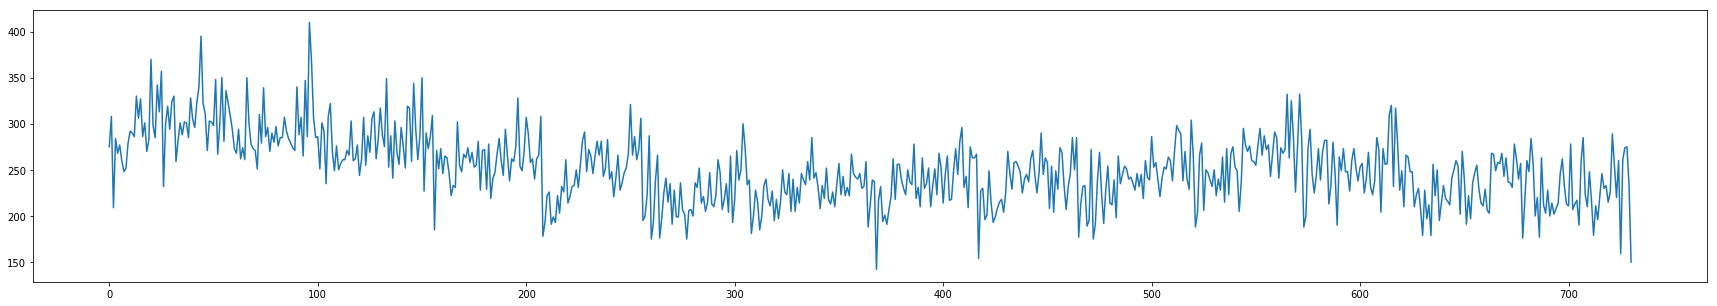

In [6]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [7]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [8]:
# windowize_data(week_numbers.index.values,20)

In [9]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [10]:
n_prev = 50
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw, n_prev, fraction_test=0.01)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((575, 50, 1), (56, 50, 1), (575,), (56,))

#### Model

In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(120, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

model_def_time = '{}_{}'.format(dt.datetime.now().day,dt.datetime.now().minute)

### Train

In [21]:
model.fit(x_train, y_train, batch_size=50, epochs=300)

Train on 575 samples
Epoch 1/300
575/575 [==============================] - 1s 3ms/sample - loss: 351.3453
Epoch 2/300
575/575 [==============================] - 1s 3ms/sample - loss: 377.2971
Epoch 3/300
575/575 [==============================] - 1s 3ms/sample - loss: 338.8085
Epoch 4/300
575/575 [==============================] - 1s 3ms/sample - loss: 346.4182
Epoch 5/300
575/575 [==============================] - 1s 3ms/sample - loss: 345.5227
Epoch 6/300
575/575 [==============================] - 2s 3ms/sample - loss: 338.1867
Epoch 7/300
575/575 [==============================] - 2s 3ms/sample - loss: 331.2341
Epoch 8/300
575/575 [==============================] - 1s 3ms/sample - loss: 365.2284
Epoch 9/300
575/575 [==============================] - 1s 3ms/sample - loss: 353.8290
Epoch 10/300
575/575 [==============================] - 1s 2ms/sample - loss: 320.9847
Epoch 11/300
575/575 [==============================] - 1s 2ms/sample - loss: 320.5489
Epoch 12/300
575/575 [=========

575/575 [==============================] - 1s 2ms/sample - loss: 299.1007
Epoch 95/300
575/575 [==============================] - 1s 2ms/sample - loss: 258.0541
Epoch 96/300
575/575 [==============================] - 1s 2ms/sample - loss: 304.3219
Epoch 97/300
575/575 [==============================] - 1s 3ms/sample - loss: 272.8823
Epoch 98/300
575/575 [==============================] - 1s 2ms/sample - loss: 276.8910
Epoch 99/300
575/575 [==============================] - 1s 3ms/sample - loss: 253.1870
Epoch 100/300
575/575 [==============================] - 1s 2ms/sample - loss: 245.3417
Epoch 101/300
575/575 [==============================] - 1s 2ms/sample - loss: 282.1843
Epoch 102/300
575/575 [==============================] - 1s 2ms/sample - loss: 398.9552
Epoch 103/300
575/575 [==============================] - 1s 2ms/sample - loss: 246.6600
Epoch 104/300
575/575 [==============================] - 1s 2ms/sample - loss: 235.8779
Epoch 105/300
575/575 [============================

575/575 [==============================] - 1s 2ms/sample - loss: 209.0893
Epoch 188/300
575/575 [==============================] - 1s 3ms/sample - loss: 223.7756
Epoch 189/300
575/575 [==============================] - 2s 3ms/sample - loss: 259.7717
Epoch 190/300
575/575 [==============================] - 2s 3ms/sample - loss: 234.3958
Epoch 191/300
575/575 [==============================] - 2s 3ms/sample - loss: 221.5854
Epoch 192/300
575/575 [==============================] - 1s 3ms/sample - loss: 235.8967
Epoch 193/300
575/575 [==============================] - 1s 2ms/sample - loss: 200.8949
Epoch 194/300
575/575 [==============================] - 1s 2ms/sample - loss: 216.9316
Epoch 195/300
575/575 [==============================] - 1s 3ms/sample - loss: 215.7026
Epoch 196/300
575/575 [==============================] - 1s 3ms/sample - loss: 218.2105
Epoch 197/300
575/575 [==============================] - 1s 2ms/sample - loss: 197.8625
Epoch 198/300
575/575 [=======================

575/575 [==============================] - 1s 2ms/sample - loss: 160.2064
Epoch 281/300
575/575 [==============================] - 1s 2ms/sample - loss: 177.9179
Epoch 282/300
575/575 [==============================] - 1s 2ms/sample - loss: 159.1048
Epoch 283/300
575/575 [==============================] - 1s 2ms/sample - loss: 179.1377
Epoch 284/300
575/575 [==============================] - 1s 2ms/sample - loss: 170.4518
Epoch 285/300
575/575 [==============================] - 1s 2ms/sample - loss: 317.4128
Epoch 286/300
575/575 [==============================] - 1s 2ms/sample - loss: 157.7480
Epoch 287/300
575/575 [==============================] - 1s 2ms/sample - loss: 130.2590
Epoch 288/300
575/575 [==============================] - 1s 2ms/sample - loss: 143.4261
Epoch 289/300
575/575 [==============================] - 1s 2ms/sample - loss: 181.0267
Epoch 290/300
575/575 [==============================] - 1s 2ms/sample - loss: 159.2280
Epoch 291/300
575/575 [=======================

In [24]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[222.50851],
       [247.87357],
       [235.92993],
       [226.49106],
       [232.76868]], dtype=float32)

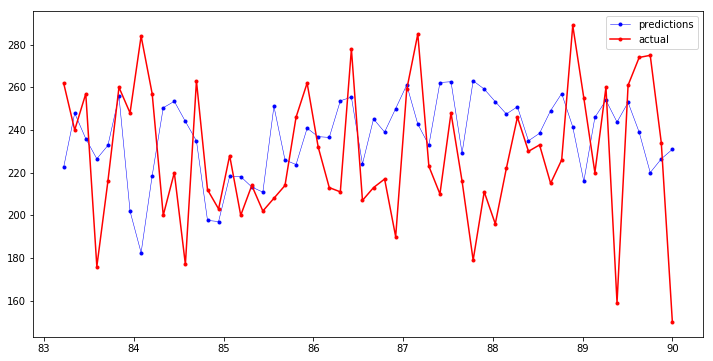

In [25]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

1480.4025131526328

Text(0.5, 0, 'epoch')

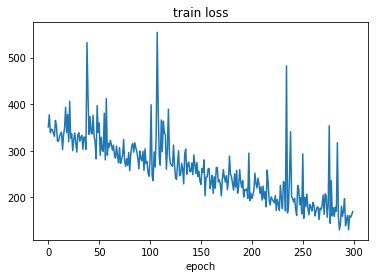

In [27]:
history = model.history
plt.title("train loss")
plt.plot( history.history["loss"] )
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

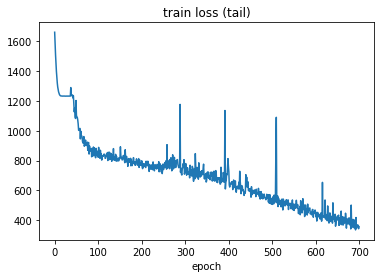

In [20]:
history = model.history
plt.title("train loss (tail)")
plt.plot( history.history["loss"][100:] )
plt.xlabel("epoch")

In [29]:
filename = 'models/lstm_8_{}'.format(model_def_time)
model.save(filename)

#### next try